# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2381 Ахметгареев Карим Ильгизович и Самулевич Степан Александрович. Вариант №1.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения
Входной сигнал:
$s(t)=\sum^M_{m=1}c_me^{i\omega_mt}$

Выходной сигнал:
$y(t)=\sum^M_{m=1}c_mH(\omega_m)e^{i\omega_mt}$

Формула для вычисления передаточной функции рекурсивного фильтра $y_n$ дискретного сигнала $x_n$:
$H(\omega)=\frac{y_n}{x_n}$

Метод наименьших квадратов:
$F(y_k)=\sum^k_{-k}(s_k-y_k)^2\rightarrow\min$

Связь передаточной функции для круговой частоты и циклической:
$H(\omega)=H(2\pi f)=\tilde{H}(f)$

Перевод значений передаточной функции в логарифмическую шкалу:
$H_{dB}(\omega)=20\lg\left(\left|\frac{y_n}{s_n}\right|\right)=20\lg\left(\left|H(\omega)\right|\right)$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики ~H(f). Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы



1. Выведем формулы для передаточной функции фильтра, соответствующего сглаживанию по прямой линии по 2k+1 точкам:
$$y_n = \frac{1}{2k+1}\sum\limits_{m=-k}^k x[n+m]$$
$$H(f) = \frac{1}{2k+1}\sum_{m=-k}^{k} e^{-j \cdot 2\pi f m}
= e^{-j \cdot 2 \pi f k}\,\frac{\sin\bigl((2k+1)\pi f\bigr)}{(2k+1)\sin(\pi f)}$$
Ниже приведены графики для $k=1, 2, 3$


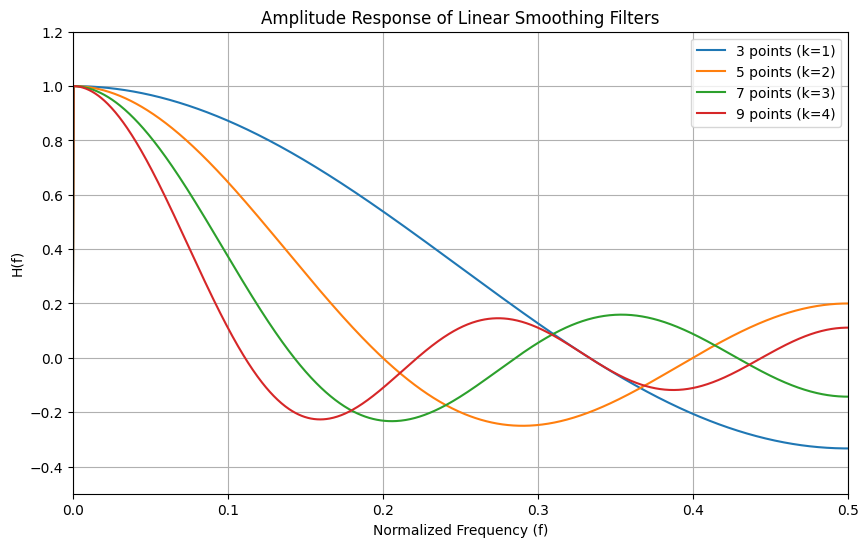

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def H_f_linear(f, k):
    n = 2 * k + 1
    return (np.sin(n * np.pi * f) / (n * np.sin(np.pi * f + 1e-10)))

f = np.linspace(0, 0.5, 1000)
k_values = [1, 2, 3, 4]
labels = ['3 points (k=1)', '5 points (k=2)', '7 points (k=3)', '9 points (k=4)']

plt.figure(figsize=(10, 6))
for k, label in zip(k_values, labels):
    H = H_f_linear(f, k)
    plt.plot(f, H, label=label)


plt.title('Amplitude Response of Linear Smoothing Filters')
plt.xlabel('Normalized Frequency (f)')
plt.ylabel('H(f)')
plt.grid(True)
plt.legend()
plt.ylim(-0.5, 1.2)
plt.xlim(0, 0.5)
plt.show()

2. Для сглаживания квадратичным полиномом по 2k+1 точкам:

$$
y_n = \sum_{m=-k}^{k} h[m] x[n+m], \quad h[m] = \frac {\left({3(2k+1)^{2}-7-20m^{2}}\right)/4}{(2k+1)\left({(2k+1)^{2}-4}\right)/3}
$$

$$
H(f) = \sum_{m=-k}^{k} h[m] e^{-j 2 \pi f m}  = h[0] + 2 \sum_{m=1}^{k} h[m] \cos(2 \pi f m)$$
Вычислим передаточную функцию для конкретных значений $k$:
*   $k=3$ $$y_n = \sum_{m=-3}^{3} \frac{7 - m^2}{21} x[n+m]$$
$$H(f) = \frac{1}{3} + 2 \left( \frac{2}{7} \cos(2 \pi f) + \frac{1}{7} \cos(4 \pi f) - \frac{2}{21} \cos(6 \pi f) \right)$$
*   $k=4$ $$y_n = \sum_{m=-4}^{4} \frac{236 - 20m^2}{924} x[n+m]$$
$$H(f) = \frac{59}{231} + 2 \left( \frac{18}{77} \cos(2 \pi f) + \frac{13}{77} \cos(4 \pi f) + \frac{2}{33} \cos(6 \pi f) - \frac{1}{11} \cos(8 \pi f) \right)$$
*   $k=5$ $$y_n = \sum_{m=-5}^{5} \frac{356 - 20m^2}{1716} x[n+m]$$
$$H(f) = \frac{89}{429} + 2 \left( \frac{28}{143} \cos(2 \pi f) + \frac{23}{143} \cos(4 \pi f) + \frac{44}{429} \cos(6 \pi f) + \frac{3}{143} \cos(8 \pi f) - \frac{4}{143} \cos(10 \pi f) \right)$$
*   $k=6$ $$y_n = \sum_{m=-6}^{6} \frac{500 - 20m^2}{2860} x[n+m]$$
$$H(f) = \frac{75}{429} + 2 \left( \frac{24}{143} \cos(2 \pi f) + \frac{21}{143} \cos(4 \pi f) + \frac{16}{143} \cos(6 \pi f) + \frac{9}{143} \cos(8 \pi f) + 0 \cdot \cos(10 \pi f) - \frac{11}{143} \cos(12 \pi f) \right)$$





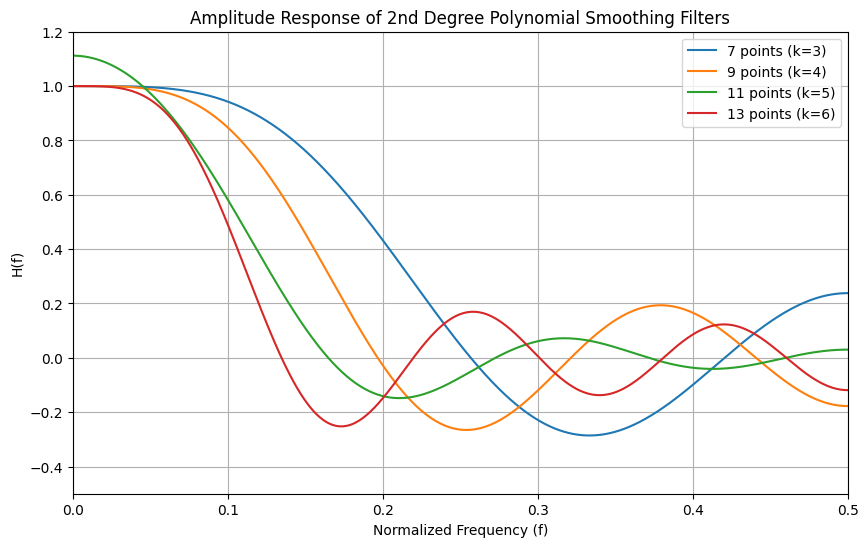

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def H_f_k3(f):
    return (1/3 + 2 * (2/7 * np.cos(2 * np.pi * f) +
                       1/7 * np.cos(4 * np.pi * f) -
                       2/21 * np.cos(6 * np.pi * f)))

def H_f_k4(f):
    return (59/231 + 2 * (18/77 * np.cos(2 * np.pi * f) +
                          13/77 * np.cos(4 * np.pi * f) +
                          2/33 * np.cos(6 * np.pi * f) -
                          1/11 * np.cos(8 * np.pi * f)))

def H_f_k5(f):
    return (89/429 + 2 * (28/143 * np.cos(2 * np.pi * f) +
                          23/143 * np.cos(4 * np.pi * f) +
                          44/429 * np.cos(6 * np.pi * f) +
                          3/143 * np.cos(8 * np.pi * f) -
                          4/143 * np.cos(10 * np.pi * f)))

def H_f_k6(f):
    return (75/429 + 2 * (24/143 * np.cos(2 * np.pi * f) +
                          21/143 * np.cos(4 * np.pi * f) +
                          16/143 * np.cos(6 * np.pi * f) +
                          9/143 * np.cos(8 * np.pi * f) +
                          0 * np.cos(10 * np.pi * f) -
                          11/143 * np.cos(12 * np.pi * f)))


f = np.linspace(0, 0.5, 1000)


H_k3 = H_f_k3(f)
H_k4 = H_f_k4(f)
H_k5 = H_f_k5(f)
H_k6 = H_f_k6(f)


plt.figure(figsize=(10, 6))
plt.plot(f, H_k3, label='7 points (k=3)')
plt.plot(f, H_k4, label='9 points (k=4)')
plt.plot(f, H_k5, label='11 points (k=5)')
plt.plot(f, H_k6, label='13 points (k=6)')

plt.title('Amplitude Response of 2nd Degree Polynomial Smoothing Filters')
plt.xlabel('Normalized Frequency (f)')
plt.ylabel('H(f)')
plt.grid(True)
plt.legend()
plt.ylim(-0.5, 1.2)
plt.xlim(0, 0.5)
plt.show()

3. Для сглаживания полиномом 4 степени по 2k+1 точкам вычислим передаточную функцию для конкретных значений $k$:
$$H(f) = \sum_{m=-k}^{k} h[m] e^{-j 2 \pi f m}  = h[0] + 2 \sum_{m=1}^{k} h[m] \cos(2 \pi f m)  $$
*   $k=4$ $$y_n = \sum_{m=-4}^{4} \frac{15 -55m +30m^{2} +135m^{3} +179m^{4}}{429} x[n+m]$$
$$  H(f) = \frac{179}{429} + 2 \left( \frac{135}{429} \cos(2 \pi f) + \frac{30}{429} \cos(4 \pi f) - \frac{55}{429} \cos(6 \pi f) + \frac{15}{429} \cos(8 \pi f) \right)  $$
*   $k=5$ $$  y_n = \sum_{m=-5}^{5} \frac{18 -45m -10m^{2} +60m^{3} +120m^{4} +143m^{5}}{429} x[n+m]  $$
$$  H(f) = \frac{143}{429}+ 2 \left( \frac{120}{429} \cos(2 \pi f) + \frac{60}{429} \cos(4 \pi f) - \frac{10}{429} \cos(6 \pi f) - \frac{45}{429} \cos(8 \pi f) + \frac{18}{429} \cos(10 \pi f) \right)  $$
*   $k=6$ $$  y_n = \sum_{m=-6}^{6} \frac{110 -198m -135m^{2} +110m^{3} +390m^{4} +600m^{5} +677m^{6}}{2431} x[n+m] $$
$$  H(f) = \frac{677}{2431} + 2 \left( \frac{600}{2431} \cos(2 \pi f) + \frac{390}{2431} \cos(4 \pi f) + \frac{110}{2431} \cos(6 \pi f) - \frac{135}{2431} \cos(8 \pi f) - \frac{198}{2431} \cos(10 \pi f) + \frac{110}{2431} \cos(12 \pi f) \right)$$
*   $k=7$ $$  y_n = \sum_{m=-7}^{7} \frac{2145 -2860m -2937m^{2} -165m^{3} +3755m^{4} +7500m^{5} +10125m^{6} +11063m^{7}}{46189} x[n+m] $$
$$  H(f) = \frac{11063}{46189} + 2 \left( \frac{10125}{46189} \cos(2 \pi f) + \frac{7500}{46189} \cos(4 \pi f) + \frac{3755}{46189} \cos(6 \pi f) - \frac{165}{46189} \cos(8 \pi f) - \frac{2937}{46189} \cos(10 \pi f) - \frac{2860}{46189} \cos(12 \pi f) + \frac{2145}{46189} \cos(14 \pi f) \right)  $$

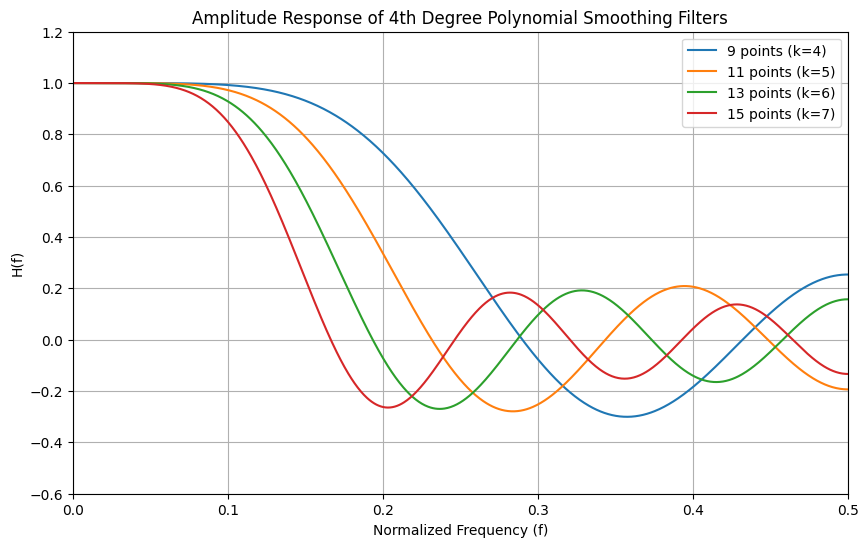

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def H_f_k4(f):
    return (179/429 + 2 * (135/429 * np.cos(2 * np.pi * f) +
                           30/429 * np.cos(4 * np.pi * f) -
                           55/429 * np.cos(6 * np.pi * f) +
                           15/429 * np.cos(8 * np.pi * f)))

def H_f_k5(f):
    return (143/429 + 2 * (120/429 * np.cos(2 * np.pi * f) +
                           60/429 * np.cos(4 * np.pi * f) -
                           10/429 * np.cos(6 * np.pi * f) -
                           45/429 * np.cos(8 * np.pi * f) +
                           18/429 * np.cos(10 * np.pi * f)))

def H_f_k6(f):
    return (677/2431 + 2 * (600/2431 * np.cos(2 * np.pi * f) +
                            390/2431 * np.cos(4 * np.pi * f) +
                            110/2431 * np.cos(6 * np.pi * f) -
                            135/2431 * np.cos(8 * np.pi * f) -
                            198/2431 * np.cos(10 * np.pi * f) +
                            110/2431 * np.cos(12 * np.pi * f)))

def H_f_k7(f):
    return (11063/46189 + 2 * (10125/46189 * np.cos(2 * np.pi * f) +
                               7500/46189 * np.cos(4 * np.pi * f) +
                               3755/46189 * np.cos(6 * np.pi * f) -
                               165/46189 * np.cos(8 * np.pi * f) -
                               2937/46189 * np.cos(10 * np.pi * f) -
                               2860/46189 * np.cos(12 * np.pi * f) +
                               2145/46189 * np.cos(14 * np.pi * f)))

f = np.linspace(0, 0.5, 1000)

H_k4 = H_f_k4(f)
H_k5 = H_f_k5(f)
H_k6 = H_f_k6(f)
H_k7 = H_f_k7(f)

plt.figure(figsize=(10, 6))
plt.plot(f, H_k4, label='9 points (k=4)')
plt.plot(f, H_k5, label='11 points (k=5)')
plt.plot(f, H_k6, label='13 points (k=6)')
plt.plot(f, H_k7, label='15 points (k=7)')

plt.title('Amplitude Response of 4th Degree Polynomial Smoothing Filters')
plt.xlabel('Normalized Frequency (f)')
plt.ylabel('H(f)')
plt.grid(True)
plt.legend()
plt.ylim(-0.6, 1.2)
plt.xlim(0, 0.5)
plt.show()

4. Сглаживание по формулам Спенсера:
$$H(f) = \sum_{m=-k}^{k} h[m] e^{-j 2 \pi f m} = h[0] + 2 \sum_{m=1}^{k} h[m] \cos(2 \pi f m)$$
Вычислим передаточную функцию для конкретных значений $   k   $:

* $k=7$

$$y_n = \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_n + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})$$
$$H(f) = \frac{74}{320} + 2 \left( \frac{67}{320} \cos(2 \pi f) + \frac{46}{320} \cos(4 \pi f) + \frac{21}{320} \cos(6 \pi f) + \frac{3}{320} \cos(8 \pi f) - \frac{5}{320} \cos(10 \pi f) - \frac{6}{320} \cos(12 \pi f) - \frac{3}{320} \cos(14 \pi f) \right)$$


* $k=10$

$$y_n = \frac{1}{350} (-s_{n-10} - 3s_{n-9} - 5s_{n-8} + 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_n + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} + 5s_{n+7} - 5s_{n+8} - 3s_{n+9} - s_{n+10})$$
$$H(f) = \frac{60}{350} + 2 \left( \frac{57}{350} \cos(2 \pi f) + \frac{47}{350} \cos(4 \pi f) + \frac{33}{350} \cos(6 \pi f) + \frac{18}{350} \cos(8 \pi f) + \frac{6}{350} \cos(10 \pi f) - \frac{2}{350} \cos(12 \pi f) - \frac{5}{350} \cos(14 \pi f) - \frac{5}{350} \cos(16 \pi f) - \frac{3}{350} \cos(18 \pi f) - \frac{1}{350} \cos(20 \pi f) \right)$$


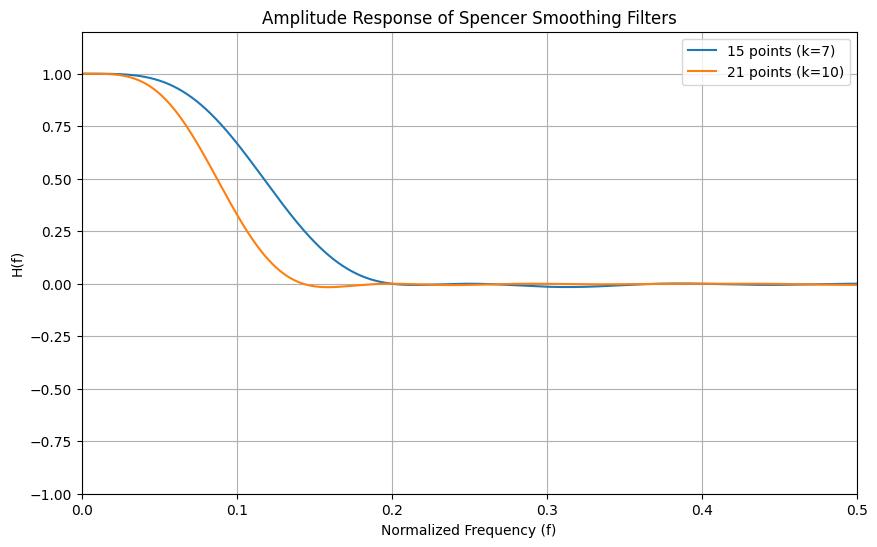

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def H_f_k7(f):
    return (74/320 + 2 * (67/320 * np.cos(2 * np.pi * f) +
                          46/320 * np.cos(4 * np.pi * f) +
                          21/320 * np.cos(6 * np.pi * f) +
                          3/320 * np.cos(8 * np.pi * f) -
                          5/320 * np.cos(10 * np.pi * f) -
                          6/320 * np.cos(12 * np.pi * f) -
                          3/320 * np.cos(14 * np.pi * f)))

def H_f_k10(f):
    return (60/350 + 2 * (57/350 * np.cos(2 * np.pi * f) +
                          47/350 * np.cos(4 * np.pi * f) +
                          33/350 * np.cos(6 * np.pi * f) +
                          18/350 * np.cos(8 * np.pi * f) +
                          6/350 * np.cos(10 * np.pi * f) -
                          2/350 * np.cos(12 * np.pi * f) -
                          5/350 * np.cos(14 * np.pi * f) -
                          5/350 * np.cos(16 * np.pi * f) -
                          3/350 * np.cos(18 * np.pi * f) -
                          1/350 * np.cos(20 * np.pi * f)))
# Диапазон частот
f = np.linspace(0, 0.5, 1000)  # Нормированная частота от 0 до 0.5

H_k7 = H_f_k7(f)
H_k10 = H_f_k10(f)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(f, H_k7, label='15 points (k=7)')
plt.plot(f, H_k10, label='21 points (k=10)')

# Настройки графика
plt.title('Amplitude Response of Spencer Smoothing Filters')
plt.xlabel('Normalized Frequency (f)')
plt.ylabel('H(f)')
plt.grid(True)
plt.legend()
plt.ylim(-1, 1.2)  # Учитываем, что H(f) для сглаживающих фильтров обычно положительна
plt.xlim(0, 0.5)
plt.show()

### Выводы  
В ходе выполнения практической работы были получены формулы для передаточных функций нерекурсивных фильтров, соответствующих сглаживанию полиномами 1, 2, 4 степеней и сглаживанию по формуле Спенсера для разного количества точек приближения. 
По полученным формулам были построены и проанализированы графики передаточной функции H ̃(ω). Данные графики также были построены в логарифмической шкале, что позволило более точно рассмотреть малейшие колебания передаточных функций.
Также был проведён сопоставительный анализ передаточных функций исследуемых фильтров.
